# INNOMATICS HACKATHON

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Reading and Understanding of Data

In [3]:
data=pd.read_csv('dataframe_.csv')
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
data.shape

(1697, 2)

#### It is observed that the given dataset contains 1697 rows and 2 columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [6]:
data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


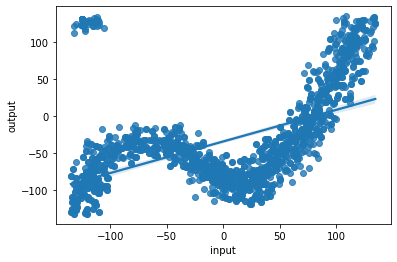

In [7]:
sns.regplot(x='input',y='output',data=data)
plt.show()

In [8]:
# Checking for percentage of null values
round(100*(data.isnull().sum()/len(data.index)), 2)

input     0.06
output    0.06
dtype: float64

##### There are 0.06% null values in both input and output columns


##### As the percentage of null values is very less, we can drop those values

In [10]:
#Checking for outlier in the numerical columns
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
90%,104.361054,84.642175
95%,114.574354,112.652706
99%,128.076325,131.000000


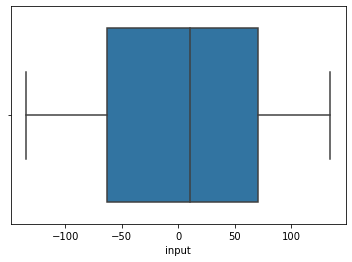

In [40]:
sns.boxplot(x = 'input', data = data)
plt.show()

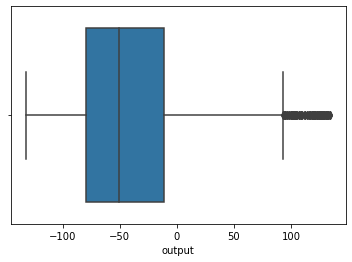

In [41]:
sns.boxplot(x = 'output', data = data)
plt.show()

##### From here it is observed that there are no outliers in the data as the percentile value is gradually increasing

In [13]:
data.isnull().sum()

input     1
output    1
dtype: int64

##### It is observed that only 1 data from input column and 1 data from output column is NULL.

##### So dropping the null values.

In [16]:
# Dropping Null values
data = data[~np.isnan(data['input'])]
data = data[~np.isnan(data['output'])]

In [17]:
data.isnull().sum()


input     0
output    0
dtype: int64

In [18]:
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


### Data Visualisation

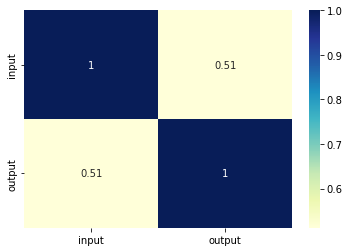

In [19]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

##### It is observed that the input and output had a correlation of 0.51.

### Performing Simple Linear Regression

#### We first assign the feature variable, `input`, in this case, to the variable `X` and the response variable, `output`, to the variable `y`.

In [20]:
X = data['input']
y = data['output']

#### Train-Test Split

We now need to split our variable into training and testing sets. We'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
# Checking the train dataset
X_train.head()

819    -117.366669
1497     50.316213
1652      6.105350
1311     -7.677098
565      79.914690
Name: input, dtype: float64

In [23]:
y_train.head()

819    -75.000000
1497   -15.031056
1652   -75.119074
1311   -64.970878
565    -50.069960
Name: output, dtype: float64

##### Building a Linear Model

##### We first need to import the `statsmodel.api` library using which we'll perform the linear regression.

In [24]:
import statsmodels.api as sm

In [25]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [26]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const   -33.893447
input     0.424727
dtype: float64

In [27]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     400.8
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           5.01e-77
Time:                        14:42:36   Log-Likelihood:                -6502.2
No. Observations:                1187   AIC:                         1.301e+04
Df Residuals:                    1185   BIC:                         1.302e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.8934      1.683    -20.144      0.0

### Residual Analysis

#### Residual analysis is used to validate the assumptions of the model

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [28]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

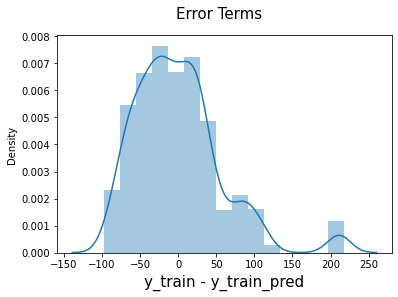

In [29]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

### The residuals are almost normally distributed with mean 0

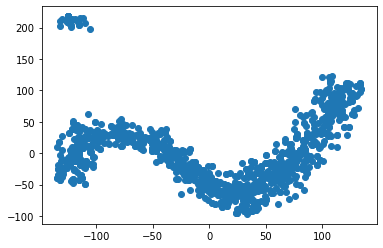

In [30]:
plt.scatter(X_train,res)
plt.show()

### Predictions on the Test Set

In [31]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [32]:
y_pred.head()

487     15.643903
1086   -81.661593
562      0.881355
1435    11.079477
1232   -60.636169
dtype: float64

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

53.036390287568096

In [35]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.2851611351389869

Here the train set accuracy is 25% and test set accuracy is 28%. 